## Classification Models with Streamlit Deployment
### ASSIGNMENT 2
### TUSHAR KANTI SANTRA
### BITS ID : 2025AB05283

### DATE    : 15-FEB-2026

---

## Dataset: Adult Income (Census Income)

**Source:** UCI Machine Learning Repository

**Link:** https://archive.ics.uci.edu/dataset/2/adult

**Problem:** Predict whether a person's annual income exceeds $50K based on census data

**Features:** 14 attributes (age, workclass, education, occupation, etc.)

**Instances:** 48,842 samples

**Task:** Binary Classification (>50K or ≤50K)

---

## 🎯 Assignment Goals

Implement and compare 6 classification models:

1. Logistic Regression
2. Decision Tree Classifier
3. K-Nearest Neighbor Classifier
4. Naive Bayes Classifier
5. Random Forest (Ensemble)
6. XGBoost (Ensemble)

**Evaluation Metrics:**
- Accuracy
- AUC Score
- Precision
- Recall
- F1 Score
- Matthews Correlation Coefficient (MCC)

---
## Step 1: Import Libraries

In [31]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, roc_auc_score, precision_score, recall_score,
    f1_score, matthews_corrcoef, confusion_matrix,
    classification_report, roc_curve
)

# Model persistence
import joblib
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set random seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


---
## Step 2: Load Adult Income Dataset

We'll load the dataset directly from UCI ML Repository using the ucimlrepo package.

In [32]:
# Install ucimlrepo if needed (uncomment if running for first time)
!pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch dataset
adult_data_set = fetch_ucirepo(id=2)

# Extract features and target
X = adult_data_set.data.features
y = adult_data_set.data.targets

# Convert to binary (0: <=50K, 1: >50K)
y = y['income'].apply(lambda x: 1 if '>50K' in str(x) else 0)

print(f"Dataset loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget distribution:")
print(y.value_counts())
print(f"\nClass balance: {y.value_counts(normalize=True)}")

Dataset loaded successfully!
Features shape: (48842, 14)
Target shape: (48842,)

Target distribution:
income
0    37155
1    11687
Name: count, dtype: int64

Class balance: income
0    0.760718
1    0.239282
Name: proportion, dtype: float64


---
## Step 3: Exploratory Data Analysis (EDA)

In [33]:
# Display first few rows
print("First 5 rows of features:")
X.head()

First 5 rows of features:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [34]:
# Dataset information
print("Dataset Information:")
X.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
dtypes: int64(6), object(8)
memory usage: 5.2+ MB


In [35]:
# Check for missing values
print("Check missing values per column:")
missing = X.isnull().sum()
print(missing[missing > 0])
print(f"\nTotal missing values: {X.isnull().sum().sum()}")

Check missing values per column:
workclass         963
occupation        966
native-country    274
dtype: int64

Total missing values: 2203


In [36]:
# Statistical summary for numerical features
print("Statistical summary:")
X.describe()

Statistical summary:


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


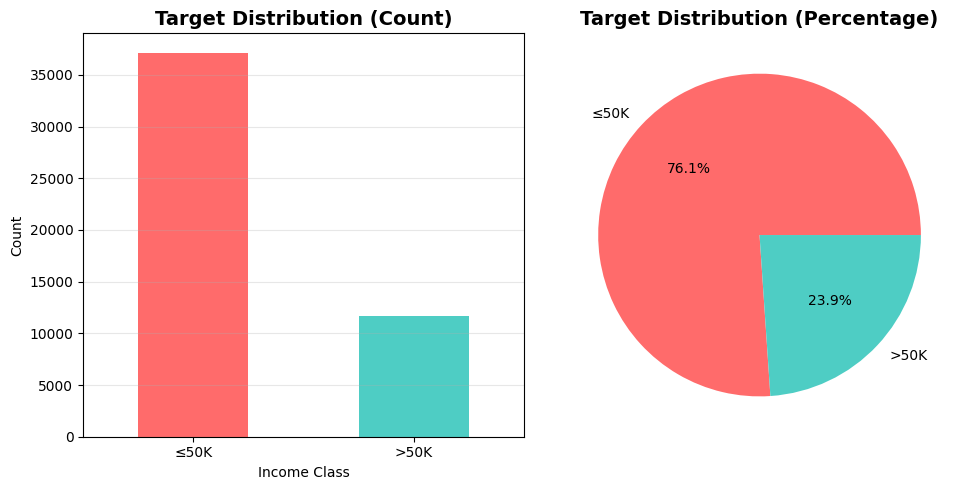

Dataset is imbalanced: 37155 (≤50K) vs 11687 (>50K)


In [37]:
# Target distribution visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color=['#FF6B6B', '#4ECDC4'])
plt.title('Target Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['≤50K', '>50K'], rotation=0)
plt.grid(axis='y', alpha=0.3)

plt.subplot(1, 2, 2)
y.value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%',
                                     colors=['#FF6B6B', '#4ECDC4'],
                                     labels=['≤50K', '>50K'])
plt.title('Target Distribution (Percentage)', fontsize=14, fontweight='bold')
plt.ylabel('')

plt.tight_layout()
plt.show()

print(f"Dataset is imbalanced: {(y==0).sum()} (≤50K) vs {(y==1).sum()} (>50K)")

In [38]:
# Identify categorical and numerical columns
categorical_colms = X.select_dtypes(include=['object']).columns.tolist()
numerical_colms = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features ({len(categorical_colms)}): {categorical_colms}")
print(f"\nNumerical features ({len(numerical_colms)}): {numerical_colms}")

Categorical features (8): ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

Numerical features (6): ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


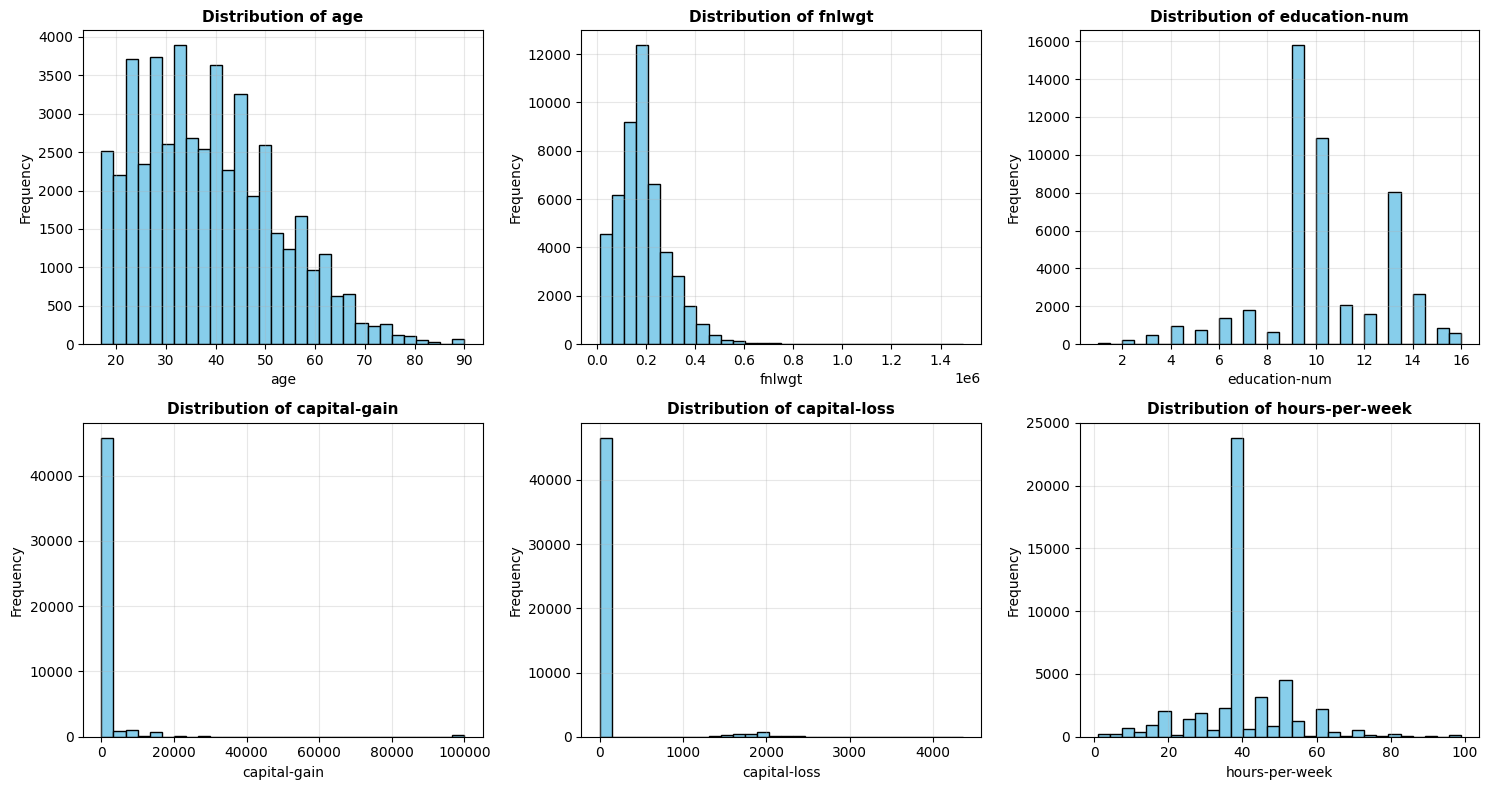

In [39]:
# Visualize numerical features
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for indx, colm in enumerate(numerical_colms):
    if indx < 6:
        axes[indx].hist(X[colm].dropna(), bins=30, color='skyblue', edgecolor='black')
        axes[indx].set_title(f'Distribution of {colm}', fontsize=11, fontweight='bold')
        axes[indx].set_xlabel(colm)
        axes[indx].set_ylabel('Frequency')
        axes[indx].grid(alpha=0.3)

plt.tight_layout()
plt.show()

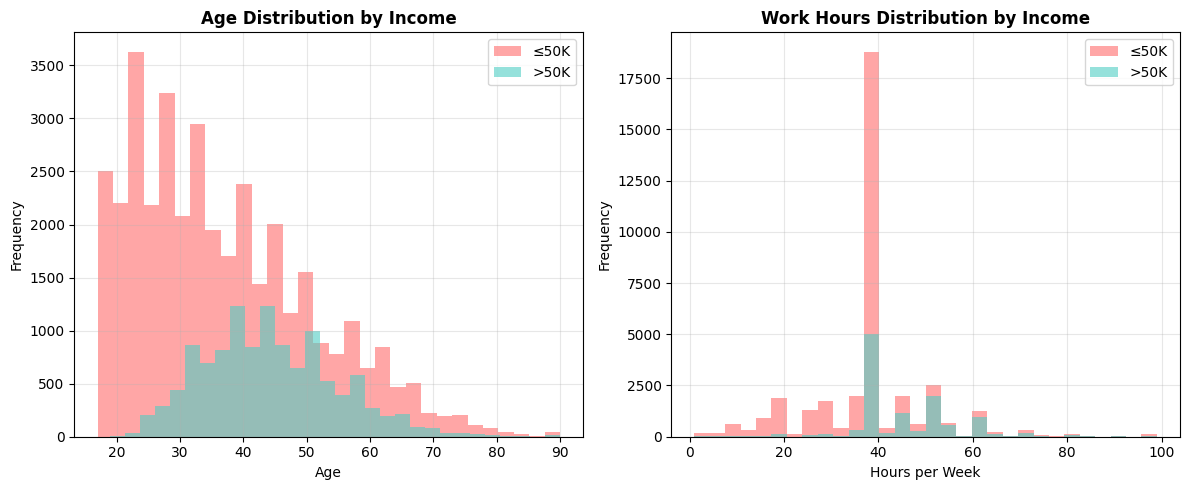

In [40]:
# Age distribution by income
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
X['age'][y==0].hist(bins=30, alpha=0.6, label='≤50K', color='#FF6B6B')
X['age'][y==1].hist(bins=30, alpha=0.6, label='>50K', color='#4ECDC4')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Income', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.subplot(1, 2, 2)
X['hours-per-week'][y==0].hist(bins=30, alpha=0.6, label='≤50K', color='#FF6B6B')
X['hours-per-week'][y==1].hist(bins=30, alpha=0.6, label='>50K', color='#4ECDC4')
plt.xlabel('Hours per Week')
plt.ylabel('Frequency')
plt.title('Work Hours Distribution by Income', fontweight='bold')
plt.legend()
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

---
## Step 4: Data Preprocessing

Handle missing values, encode categorical variables, and scale features.

In [41]:
# Create a copy for preprocessing
df = X.copy()

# Handle missing values (if any)
# For categorical: fill with mode
for col in categorical_colms:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

# For numerical: fill with median
for col in numerical_colms:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

print("Missing values handled")
print(f"Remaining missing values: {df.isnull().sum().sum()}")

Missing values handled
Remaining missing values: 0


In [42]:
# Encode categorical variables using Label Encoding
lbl_encoders = {}

for colm in categorical_colms:
    lblen = LabelEncoder()
    df[colm] = lblen.fit_transform(df[colm].astype(str))
    lbl_encoders[colm] = lblen

print("Categorical variables encoded")
print(f"\nEncoded dataset shape: {df.shape}")
df.head()

Categorical variables encoded

Encoded dataset shape: (48842, 14)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5


In [43]:
# Split into features and target
X_record_processed = df
y_record_processed = y

print(f"Final features shape: {X_record_processed.shape}")
print(f"Final target shape: {y_record_processed.shape}")
print(f"\nNumber of features: {X_record_processed.shape[1]}")

Final features shape: (48842, 14)
Final target shape: (48842,)

Number of features: 14


In [44]:
# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X_record_processed, y_record_processed,
    test_size=0.2,
    random_state=RANDOM_STATE,
    stratify=y_record_processed
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"\nTraining target distribution:")
print(y_train.value_counts())
print(f"\nTest target distribution:")
print(y_test.value_counts())

Training set: (39073, 14)
Test set: (9769, 14)

Training target distribution:
income
0    29724
1     9349
Name: count, dtype: int64

Test target distribution:
income
0    7431
1    2338
Name: count, dtype: int64


In [45]:
# Feature scaling (important for Logistic Regression and KNN)
sscaler = StandardScaler()
X_train_sscaled = sscaler.fit_transform(X_train)
X_test_sscaled = sscaler.transform(X_test)

print("Feature scaling completed")
print(f"Scaled training mean: {X_train_sscaled.mean():.6f}")
print(f"Scaled training std: {X_train_sscaled.std():.6f}")

Feature scaling completed
Scaled training mean: 0.000000
Scaled training std: 1.000000


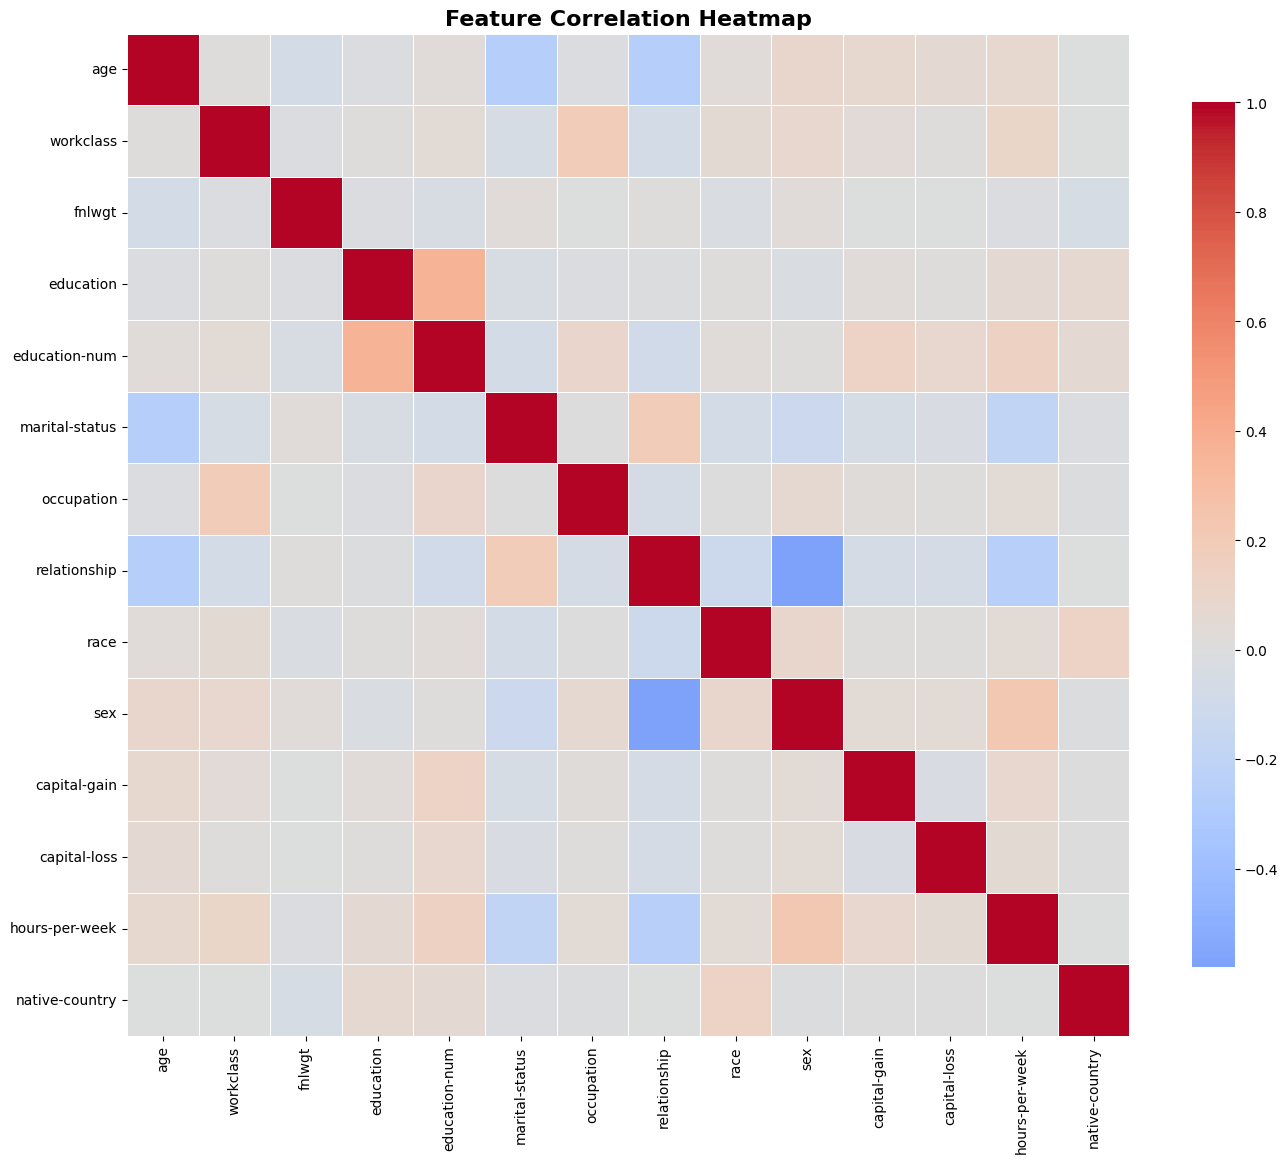

In [46]:
# Correlation matrix
plt.figure(figsize=(14, 12))
correlation = X_record_processed.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot=False)
plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

---
## Step 5: Model Training and Evaluation

Train all 6 classification models and evaluate using comprehensive metrics.

In [47]:
# Evaluation function
def evaluate_model(y_true, y_pred, y_pred_proba=None, model_name="Model"):
    """
    Calculate comprehensive evaluation metrics
    """
    results = {}

    # Basic metrics
    results['Accuracy'] = accuracy_score(y_true, y_pred)
    results['Precision'] = precision_score(y_true, y_pred, average='binary', zero_division=0)
    results['Recall'] = recall_score(y_true, y_pred, average='binary', zero_division=0)
    results['F1 Score'] = f1_score(y_true, y_pred, average='binary', zero_division=0)
    results['MCC'] = matthews_corrcoef(y_true, y_pred)

    # AUC Score
    if y_pred_proba is not None:
        try:
            results['AUC'] = roc_auc_score(y_true, y_pred_proba[:, 1])
        except:
            results['AUC'] = 'N/A'
    else:
        results['AUC'] = 'N/A'

    return results


def print_results(results, model_name):
    """
    Pretty print results
    """
    print(f"\n{'='*60}")
    print(f"{model_name} - Evaluation Results")
    print(f"{'='*60}")
    for metric, value in results.items():
        if isinstance(value, (int, float)):
            print(f"{metric:20s}: {value:.4f}")
        else:
            print(f"{metric:20s}: {value}")
    print(f"{'='*60}")

print("Evaluation functions defined")

Evaluation functions defined


### 5.1 Logistic Regression

In [48]:
print("Training Logistic Regression...")

lgr_model = LogisticRegression(
    random_state=RANDOM_STATE,
    max_iter=2000,               # Increased iterations
    C=0.10,                        # Regularization strength (tune this!)
    solver='liblinear',           # Different solver
    penalty='l2'                 # L2 regularization

)

lgr_model.fit(X_train_sscaled, y_train)

lr_pred = lgr_model.predict(X_test_sscaled)
lr_pred_proba = lgr_model.predict_proba(X_test_sscaled)

lr_results = evaluate_model(y_test, lr_pred, lr_pred_proba, "Logistic Regression")
print_results(lr_results, "Logistic Regression")

Training Logistic Regression...

Logistic Regression - Evaluation Results
Accuracy            : 0.8241
Precision           : 0.7061
Recall              : 0.4542
F1 Score            : 0.5528
MCC                 : 0.4667
AUC                 : 0.8488


### 5.2 Decision Tree Classifier

In [49]:
print("Training Decision Tree...")

dt_model = DecisionTreeClassifier(
    random_state=RANDOM_STATE,
    max_depth=12,                    # Adjusted depth
    min_samples_split=20,            # Minimum samples to split
    min_samples_leaf=10,             # Minimum samples in leaf
    max_features='sqrt',             # Feature selection
    criterion='gini'                 # Split criterion

)
dt_model.fit(X_train, y_train)

dt_pred = dt_model.predict(X_test)
dt_pred_proba = dt_model.predict_proba(X_test)

dt_results = evaluate_model(y_test, dt_pred, dt_pred_proba, "Decision Tree")
print_results(dt_results, "Decision Tree")

Training Decision Tree...

Decision Tree - Evaluation Results
Accuracy            : 0.8476
Precision           : 0.7665
Recall              : 0.5222
F1 Score            : 0.6212
MCC                 : 0.5454
AUC                 : 0.8874


### 5.3 K-Nearest Neighbors

In [50]:
print("Training K-Nearest Neighbors...")

knn_model = KNeighborsClassifier(
    n_neighbors=7,                   # Optimized K (try 3, 5, 7, 9)
    weights='distance',              # Weight by distance
    metric='manhattan',              # Different distance metric
    algorithm='auto'                 # Automatic algorithm selection
)
knn_model.fit(X_train_sscaled, y_train)

knn_pred = knn_model.predict(X_test_sscaled)
knn_pred_proba = knn_model.predict_proba(X_test_sscaled)

knn_results = evaluate_model(y_test, knn_pred, knn_pred_proba, "KNN")
print_results(knn_results, "K-Nearest Neighbors")

Training K-Nearest Neighbors...

K-Nearest Neighbors - Evaluation Results
Accuracy            : 0.8299
Precision           : 0.6670
Recall              : 0.5774
F1 Score            : 0.6190
MCC                 : 0.5124
AUC                 : 0.8673


### 5.4 Naive Bayes (Gaussian)

In [51]:
print("Training Naive Bayes...")

nb_model = GaussianNB(var_smoothing=1e-9)
nb_model.fit(X_train, y_train)

nb_pred = nb_model.predict(X_test)
nb_pred_proba = nb_model.predict_proba(X_test)

nb_results = evaluate_model(y_test, nb_pred, nb_pred_proba, "Naive Bayes")
print_results(nb_results, "Naive Bayes")

Training Naive Bayes...

Naive Bayes - Evaluation Results
Accuracy            : 0.7964
Precision           : 0.6495
Recall              : 0.3242
F1 Score            : 0.4325
MCC                 : 0.3541
AUC                 : 0.8278


### 5.5 Random Forest

In [52]:
print("Training Random Forest...")

rf_model = RandomForestClassifier(
    n_estimators=200,                # More trees
    random_state=RANDOM_STATE,
    max_depth=20,                    # Deeper trees
    min_samples_split=10,            # Minimum samples to split
    min_samples_leaf=4,              # Minimum samples in leaf
    max_features='sqrt',             # Feature selection
    bootstrap=True,                  # Bootstrap samples
    n_jobs=-1                        # Use all CPU cores

)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)

rf_results = evaluate_model(y_test, rf_pred, rf_pred_proba, "Random Forest")
print_results(rf_results, "Random Forest")

Training Random Forest...

Random Forest - Evaluation Results
Accuracy            : 0.8677
Precision           : 0.7899
Recall              : 0.6095
F1 Score            : 0.6881
MCC                 : 0.6141
AUC                 : 0.9196


### 5.6 XGBoost

In [53]:
print("Training XGBoost...")

xgb_model = XGBClassifier(random_state=RANDOM_STATE, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_pred = xgb_model.predict(X_test)
xgb_pred_proba = xgb_model.predict_proba(X_test)

xgb_results = evaluate_model(y_test, xgb_pred, xgb_pred_proba, "XGBoost")
print_results(xgb_results, "XGBoost")

Training XGBoost...

XGBoost - Evaluation Results
Accuracy            : 0.8752
Precision           : 0.7785
Recall              : 0.6689
F1 Score            : 0.7196
MCC                 : 0.6430
AUC                 : 0.9291


---
## Step 6: Model Comparison

In [54]:
# Create comparison table
comparison_df = pd.DataFrame([
    lr_results,
    dt_results,
    knn_results,
    nb_results,
    rf_results,
    xgb_results
], index=[
    'Logistic Regression',
    'Decision Tree',
    'K-Nearest Neighbors',
    'Naive Bayes',
    'Random Forest',
    'XGBoost'
])

# Reorder columns
comparison_df = comparison_df[['Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'MCC']]

print("\n" + "="*100)
print("MODEL COMPARISON TABLE - Adult Income Dataset")
print("="*100)
print(comparison_df.to_string())
print("="*100)

# Save comparison
comparison_df.to_csv('model_comparison.csv')
print("\nComparison saved to model_comparison.csv")


MODEL COMPARISON TABLE - Adult Income Dataset
                     Accuracy       AUC  Precision    Recall  F1 Score       MCC
Logistic Regression  0.824138  0.848804   0.706117  0.454234  0.552837  0.466688
Decision Tree        0.847579  0.887400   0.766478  0.522241  0.621216  0.545351
K-Nearest Neighbors  0.829870  0.867285   0.666996  0.577417  0.618982  0.512395
Naive Bayes          0.796397  0.827778   0.649529  0.324209  0.432525  0.354108
Random Forest        0.867745  0.919602   0.789911  0.609495  0.688073  0.614119
XGBoost              0.875218  0.929111   0.778497  0.668948  0.719577  0.642965

Comparison saved to model_comparison.csv


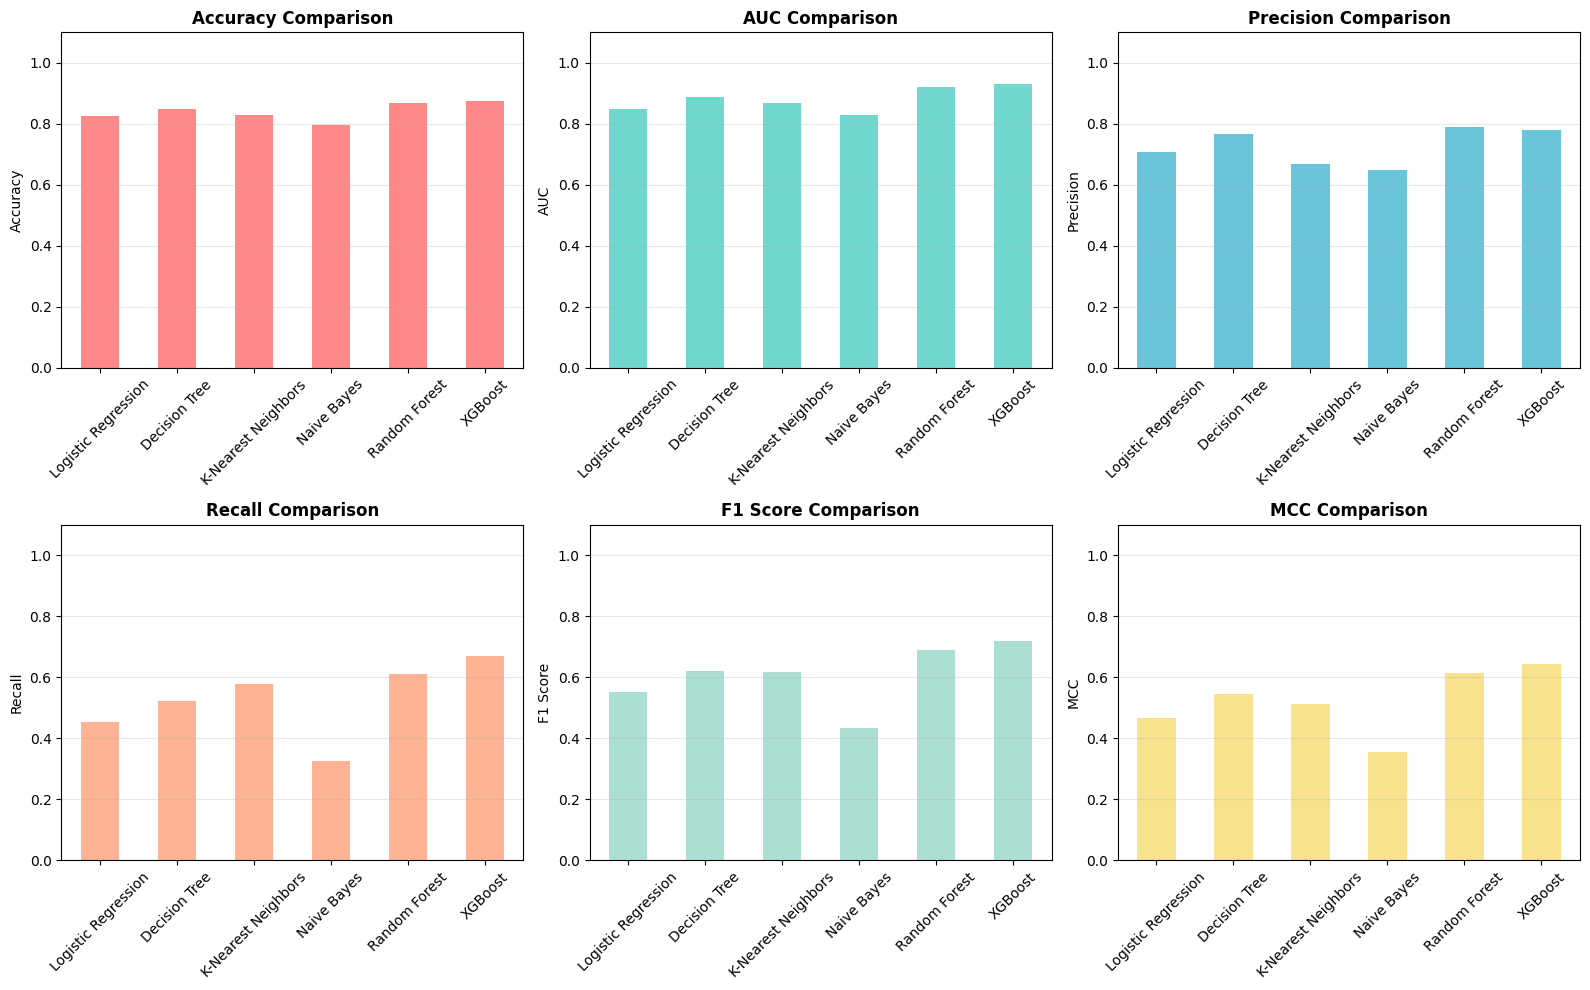

Comparison chart saved


In [55]:
# Visualize comparison
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

metrics = ['Accuracy', 'AUC', 'Precision', 'Recall', 'F1 Score', 'MCC']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

for idx, metric in enumerate(metrics):
    if metric == 'AUC':
        data = comparison_df[metric].replace('N/A', np.nan).astype(float)
    else:
        data = comparison_df[metric]

    data.plot(kind='bar', ax=axes[idx], color=colors[idx], alpha=0.8)
    axes[idx].set_title(f'{metric} Comparison', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel(metric)
    axes[idx].set_xlabel('')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)
    axes[idx].set_ylim([0, 1.1])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Comparison chart saved")

---
## Step 7: Confusion Matrices

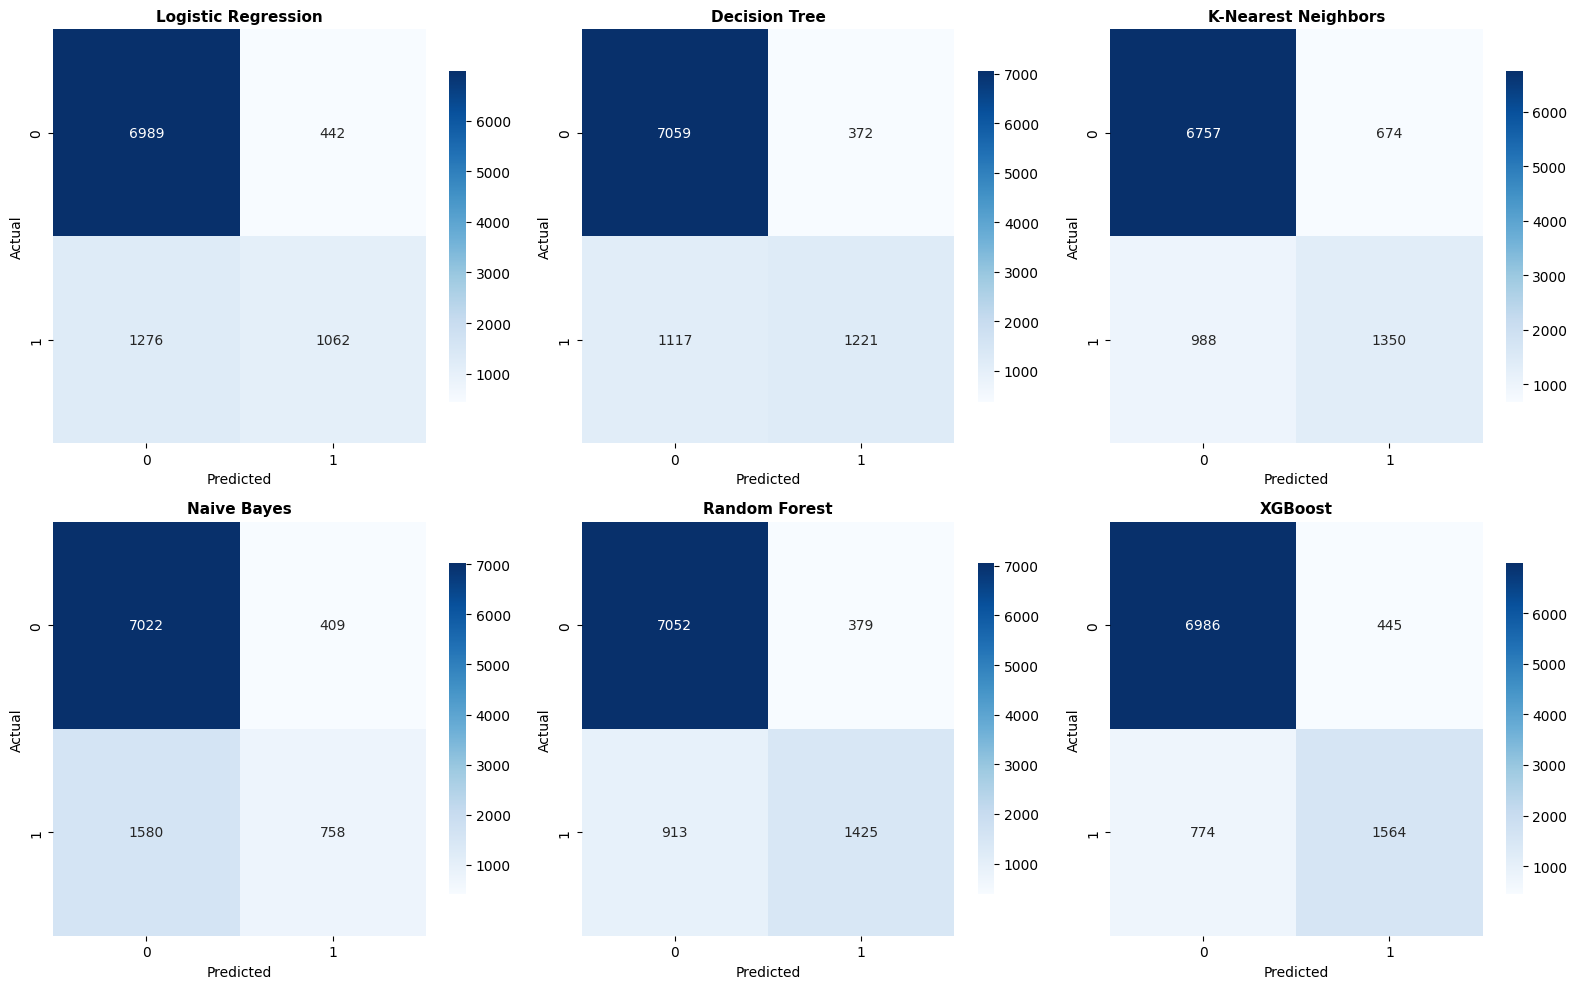

In [56]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

predictions = [
    ('Logistic Regression', lr_pred),
    ('Decision Tree', dt_pred),
    ('K-Nearest Neighbors', knn_pred),
    ('Naive Bayes', nb_pred),
    ('Random Forest', rf_pred),
    ('XGBoost', xgb_pred)
]

for idx, (name, pred) in enumerate(predictions):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx],
                cbar_kws={'shrink': 0.8})
    axes[idx].set_title(f'{name}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Actual')
    axes[idx].set_xlabel('Predicted')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

---
## Step 8: Classification Reports

In [57]:
for name, pred in predictions:
    print(f"\n{'='*70}")
    print(f"{name} - Classification Report")
    print(f"{'='*70}")
    print(classification_report(y_test, pred, target_names=['≤50K', '>50K']))


Logistic Regression - Classification Report
              precision    recall  f1-score   support

        ≤50K       0.85      0.94      0.89      7431
        >50K       0.71      0.45      0.55      2338

    accuracy                           0.82      9769
   macro avg       0.78      0.70      0.72      9769
weighted avg       0.81      0.82      0.81      9769


Decision Tree - Classification Report
              precision    recall  f1-score   support

        ≤50K       0.86      0.95      0.90      7431
        >50K       0.77      0.52      0.62      2338

    accuracy                           0.85      9769
   macro avg       0.81      0.74      0.76      9769
weighted avg       0.84      0.85      0.84      9769


K-Nearest Neighbors - Classification Report
              precision    recall  f1-score   support

        ≤50K       0.87      0.91      0.89      7431
        >50K       0.67      0.58      0.62      2338

    accuracy                           0.83      9769

---
## Step 9: Save Models for Deployment

In [58]:
# Create models directory
os.makedirs('models', exist_ok=True)

# Save all models
models_dict = {
    'logistic_regression.pkl': lgr_model,
    'decision_tree.pkl': dt_model,
    'knn.pkl': knn_model,
    'naive_bayes.pkl': nb_model,
    'random_forest.pkl': rf_model,
    'xgboost.pkl': xgb_model,
    'scaler.pkl': sscaler
}

for filename, model in models_dict.items():
    filepath = os.path.join('models', filename)
    joblib.dump(model, filepath)
    print(f"Saved: {filepath}")

# Save label encoders
joblib.dump(lbl_encoders, 'models/label_encoders.pkl')
print(f"Saved: models/lbl_encoders.pkl")

print("\nAll models saved successfully!")

Saved: models/logistic_regression.pkl
Saved: models/decision_tree.pkl
Saved: models/knn.pkl
Saved: models/naive_bayes.pkl
Saved: models/random_forest.pkl
Saved: models/xgboost.pkl
Saved: models/scaler.pkl
Saved: models/lbl_encoders.pkl

All models saved successfully!


In [59]:
# Export test data for Streamlit
test_export = X_test.copy()
test_export['target'] = y_test.values
test_export.to_csv('test_data.csv', index=False)

print(f"Test data saved: {test_export.shape}")
print("This file can be uploaded to your Streamlit app for testing")

Test data saved: (9769, 15)
This file can be uploaded to your Streamlit app for testing


---
## Step 10: Model Performance Observations (3 Marks)

**TODO: Replace this with your detailed analysis**

### 1. Best Performing Model
[Analyze which model achieved the highest scores and why it worked well for this dataset]

### 2. Model Comparisons

**Ensemble Methods:**
[Compare Random Forest vs XGBoost performance and computational cost]

**Simple vs Complex Models:**
[Discuss Logistic Regression vs ensemble methods]

**Decision Tree Analysis:**
[Discuss if there were signs of overfitting, depth impact]

### 3. Precision vs Recall Trade-offs
[Which models had better precision? Better recall? Why does this matter for income prediction?]

### 4. Impact of Class Imbalance
[The dataset has ~75% ≤50K and ~25% >50K. How did this affect different models?]

### 5. Feature Importance Insights
[For Random Forest/XGBoost, which features were most important?]

### 6. Computational Efficiency
[Which models trained fastest? Which took longest?]

### 7. Recommendation for Production Deployment
**Recommended Model:** [Your choice]

**Justification:**
- Performance metrics: [specific numbers]
- Computational cost: [training/prediction time]
- Interpretability: [can stakeholders understand it?]
- Robustness: [handles imbalanced data well?]


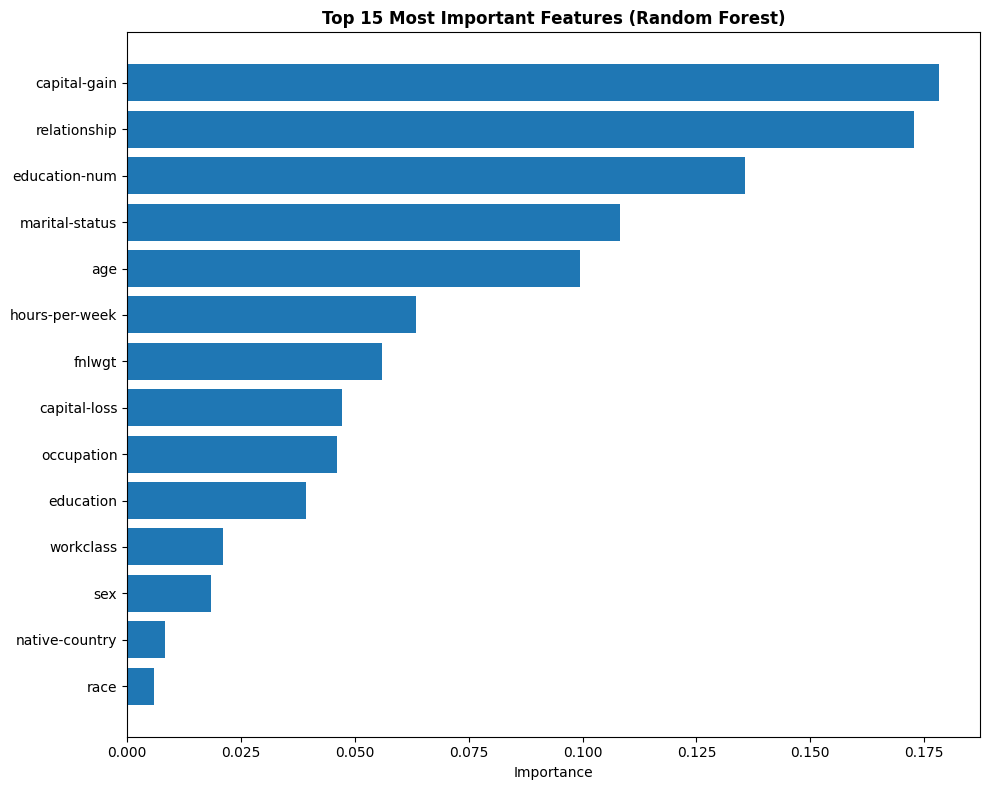


Top 10 Most Important Features:
           feature  importance
10    capital-gain    0.178332
7     relationship    0.172708
4    education-num    0.135706
5   marital-status    0.108253
0              age    0.099483
12  hours-per-week    0.063490
2           fnlwgt    0.055869
11    capital-loss    0.047146
6       occupation    0.046053
3        education    0.039204


In [60]:
# Feature importance from Random Forest
feature_importance = pd.DataFrame({
    'feature': X_record_processed.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'][:15], feature_importance['importance'][:15])
plt.xlabel('Importance')
plt.title('Top 15 Most Important Features (Random Forest)', fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))